# Introduction

This Jupyter notebook will walk you through the generation and analysis of Priori transcription factor activity scores. For this demonstration, we will replicate the several steps of the TCGA BRCA analysis from our [pre-print](https://www.biorxiv.org/content/10.1101/2022.12.16.520295v2).

This notebook requires the use of the conda package manager. If you do not have anaconda or miniconda 3 already installed on your computer, please first follow [these steps](https://engineeringfordatascience.com/posts/install_miniconda_from_the_command_line/) to set it up on your device.

## Set-up environment

Once conda has been set-up, we need to install the appropriate packages in order to run our analysis. First, we will install the ipykernel in order to create python environments for our Jupyter notebooks. Then, we will install irkernel in order to run R commands in a Jupyter notebook.

Open your terminal and input the following commands:

conda create -n priori_jupyter_env

conda activate priori_jupyter_env

conda install -c anaconda jupyter

conda install -c anaconda ipykernel

conda install -c conda-forge libgfortran

conda install -c conda-forge r-base

conda install -c conda-forge r-irkernel

conda install -c conda-forge r-tidyverse

conda install -c bioconda r-seurat

conda install -c conda-forge r-ggpubr

conda install -c conda-forge r-patchwork

conda install -c conda-forge r-cowplot

python -m ipykernel install --user --name=priori_tcga_brca_tutorial_env

## Update the kernel

From the menu on the top of the Jupyter notebook, change the Kernel to "priori_tcga_brca_env2". Select "Kernel" -> "Change kernel" -> "priori_tcga_brca_tutorial_env".

# Priori analysis of TCGA BRCA

## Set-up environment

Once we've updated our kernel, we can download Priori using the conda package manager.

In [1]:
%%bash

conda install -c conda-forge priori

Solving environment: ...working... done

# All requested packages already installed.



## Prepare input data

Now that we've downloaded the appropriate packages, we can generate Priori transcription factor activity scores. First, we must make sure that the data is in the proper format. For this demonstration, we will use the TCGA BRCA bulk RNA-seq data, which is available on our Zenodo page (XXX).

In [ ]:
%%bash

wget XXX

After it is downloaded, we need to confirm that it is in the correct format. The gene expression counts should be normalized and gene names should be listed as gene symbols. The gene names should be listed under a column titled "features". Lastly, the normalized expression data should be stored in each column named by the patient sample.

In [2]:
%%bash

cut -d$'\t' -f 1-5 "tcga_brca_normalized_counts.tsv" | head

features	TCGA-3C-AAAU-01	TCGA-3C-AALI-01	TCGA-3C-AALJ-01	TCGA-3C-AALK-01
LOC100130426	0	0	0.9066	0
UBE2Q2P3	16.3644	9.2659	11.6228	12.0894
UBE2Q2P3.1	12.9316	17.379	9.2294	11.0799
HMGB1P1	52.1503	69.7553	154.2974	143.8643
TIMM23	408.076	563.8934	1360.8341	865.5358
MOXD2	0	0	0	0
LOC155060	1187.005	516.0413	592.0218	552.7513
RNU12.2P	0	1.0875	0	0.4137
SSX9	0	0.5438	0	0


## Generate Priori scores

We are now ready to generate Priori transcription factor activity scores. Priori can be called using the following format:

priori expr out_dir [--help] [--regulon "<value>"] [--regulon_size "<value>"] 
                    [--scaler_type "<value>"] [--thresh_filter "<value>"] 

Required arguments:
    expr                A tab-delimited normalized expression matrix of the shape 
                        [n_features, n_samples]
                        
    out_dir             Output directory where the serialized Priori object and 
                        priori activity scores will be saved

Optional arguments:

    --regulon           A prior network that contains the transcriptional regulators 
                        (Regulator), target genes (Target), edge weights (MoA), and
                        likelihood of interaction (likelihood). The network should be 
                        formatted as ['Regulator','Target','MoA','likelihood']
                        
    --regulon_size      Number of downstream target genes required for a given 
                        transcriptional regulator. Default = 15
                        
    --scaler_type       Method to scale normalized expression. Options include standard, 
                        robust, minmax, or quant. Default = robust.
                        
    --thresh_filter     Remove features with a standard deviation below this value. Default = 0.1.

We will be analyzing TCGA BRCA using Pathway Commons regulatory relationships, so we only have to provide the expression dataset (`expr`) and the output directory (`out_dir`).

In [3]:
%%bash

priori tcga_brca_normalized_counts.tsv tcga_brca_priori_results

Loaded object from disk at /Users/yashar/miniconda3/envs/priori_jupyter_tutorial_env/lib/python3.10/site-packages/priori/data/primary_intx_regulon.pkl
------
n-features: 20531
n-samples: 1100
scaler: None
scaled:        False
regulon threshold: 15
regulon nodes: 1513
regulon edges: 122785
------


Scaling data...

--- log2 normalization ---
--- Centering features with robust scaler ---

Data scaled!


Assigning weights...


Weights assigned!


Calculating enrichment...

--- Calculating regulon enrichment scores ---


100%|██████████| 280/280 [21:08:57<00:00, 271.92s/it]


AGT
AHR
AKT1
ALB
ALX1
APP
AR
ARNT
ARNTL
ATF1
ATF2
ATF3
ATF4
ATF6
BACH1
BACH2
BPTF
BRCA1
CARM1
CAT
CBFA2T3
CDC5L
CDKN1A
CDX2
CEBPA
CEBPB
CEBPD
CEBPG
CHD9
CLOCK
CREB1
CREBBP
CRX
CTNNB1
CUX1
CXCL8
DBP
DDIT3
E2F1
E2F2
E2F3
E4F1
EBF2
EDN1
EGF
EGFR
EGR1
EGR2
EGR3
EGR4
ELF1
ELF2
ELK1
EN1
EP300
EPAS1
ESR1
ESR2
ESRRA
ETS1
ETS2
ETV4
FGF2
FOS
FOSL1
FOXA1
FOXA2
FOXD1
FOXD3
FOXF2
FOXI1
FOXJ1
FOXJ2
FOXL1
FOXM1
FOXO1
FOXO3
FOXO4
FOXQ1
FSHB
GABPB1
GABPB2
GATA1
GATA2
GATA3
GATA4
GATA6
GCM1
GFI1
GSK3B
GTF2A2
GTF3A
HAND1
HELZ2
HIF1A
HLF
HMGA1
HMOX1
HMX1
HNF1A
HOXA4
HOXA5
HOXA9
HSF1
HSF2
IFNA1
IFNA13
IFNA2
IFNB1
IFNG
IGF1
IGF1R
IL10
IL12B
IL12RB1
IL13
IL1A
IL1B
IL2
IL23A
IL4
IL6
INS
IRF1
IRF2
IRF7
IRF8
JAK2
JUN
JUNB
JUND
KAT2A
KAT2B
KLF12
LEF1
LHX3
LMO2
MAF
MAFG
MAPK1
MAPK14
MAPK3
MAPK8
MAX
MAZ
MED1
MEF2B
MEIS1
MIF
MSX1
MTF1
MYB
MYC
MYCN
MYOD1
MYOG
NCOA1
NCOA2
NCOA3
NCOA6
NF1
NFATC1
NFATC2
NFATC3
NFE2
NFE2L1
NFE2L2
NFIL3
NFKB1
NFKBIA
NGF
NHLH1
NOG
NOTCH1
NPAS2
NQO1
NR1H3
NR1H4
NR1I2
NR1I3
NR2F2
NR3C1
NR6A

## Change kernel

Now that we've generated Priori scores, we can analyze the output to understand the important transcription factor drivers in this dataset. The remainder of the analysis will be performed in R. Like before, we will need to change the kernel so we can perform the following analyses. Select "Kernel" -> "Change kernel" -> "R".

# Analyze Priori scores

Once we've generated Priori scores and have changed our kernel, we can now start to analyze the scores we generated.

## Load libraries

In [1]:
library(tidyverse)
library(ggpubr)
library(Seurat)
library(patchwork)
library(cowplot)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp 

## Custom functions

In [2]:
# Manuscript plot colors
plot_cols <- c("#2F639B", "#4DA4D2")

# Plot PCA with x and y density plots
plot_pca <- function(seurat_object, color_by){
  
  # Extract UMAP coordinates
  regulon_embed <- as.data.frame(seurat_object@reductions$pca@cell.embeddings)
  regulon_embed$Sample_ID <- rownames(regulon_embed)
  clinical_data <- as.data.frame(so_subtype@meta.data)
  clinical_data$Sample_ID <- rownames(clinical_data)
  clinical_p3_umap <- left_join(clinical_data, regulon_embed)
  
  # Main plot
  pmain <- ggscatter(clinical_p3_umap, x = "PC_1", y = "PC_2", color = color_by, size = 3) +
    scale_fill_manual(values = plot_cols) +
    scale_color_manual(values = plot_cols)
  
  # Marginal densities along x axis
  xdens <- axis_canvas(pmain, axis = "x")+
    geom_density(data = clinical_p3_umap, aes_string(x = "PC_1", fill = color_by),
                alpha = 0.7, size = 0) +
    scale_fill_manual(values = plot_cols) +
    scale_color_manual(values = plot_cols)
  
  # Marginal densities along y axis
  # Need to set coord_flip = TRUE, if you plan to use coord_flip()
  ydens <- axis_canvas(pmain, axis = "y", coord_flip = TRUE)+
    geom_density(data = clinical_p3_umap, aes_string(x = "PC_2", fill = color_by),
                  alpha = 0.7, size = 0) +
    scale_fill_manual(values = plot_cols) +
    scale_color_manual(values = plot_cols) +
    coord_flip()
  
  # Create plots 
  p1 <- insert_xaxis_grob(pmain, xdens, grid::unit(.1, "null"), position = "top")
  p2 <- insert_yaxis_grob(p1, ydens, grid::unit(.1, "null"), position = "right")
  
  return(p2)
}

# Plot UMAP with x and y density plots
plot_umap <- function(seurat_object, color_by){
  
  # Extract UMAP coordinates
  regulon_embed <- as.data.frame(seurat_object@reductions$umap@cell.embeddings)
  regulon_embed$Sample_ID <- rownames(regulon_embed)
  clinical_data <- as.data.frame(so_subtype@meta.data)
  clinical_data$Sample_ID <- rownames(clinical_data)
  clinical_p3_umap <- left_join(clinical_data, regulon_embed)
  
  # Main plot
  pmain <- ggscatter(clinical_p3_umap, x = "UMAP_1", y = "UMAP_2", color = color_by, size = 3) +
    scale_fill_manual(values = plot_cols) +
    scale_color_manual(values = plot_cols)
  
  # Marginal densities along x axis
  xdens <- axis_canvas(pmain, axis = "x")+
    geom_density(data = clinical_p3_umap, aes_string(x = "UMAP_1", fill = color_by),
                alpha = 0.7, size = 0) +
    scale_fill_manual(values = plot_cols) +
    scale_color_manual(values = plot_cols)
  
  # Marginal densities along y axis
  # Need to set coord_flip = TRUE, if you plan to use coord_flip()
  ydens <- axis_canvas(pmain, axis = "y", coord_flip = TRUE)+
    geom_density(data = clinical_p3_umap, aes_string(x = "UMAP_2", fill = color_by),
                  alpha = 0.7, size = 0) +
    coord_flip() +
    scale_fill_manual(values = plot_cols) +
    scale_color_manual(values = plot_cols)
  
  # Create plots 
  p1 <- insert_xaxis_grob(pmain, xdens, grid::unit(.1, "null"), position = "top")
  p2 <- insert_yaxis_grob(p1, ydens, grid::unit(.1, "null"), position = "right")
  
  return(p2)
}

## Load data

In [3]:
# Priori Scores
priori_scores <- read.table("tcga_brca_priori_results/priori_activity_scores.tsv", sep = "\t", header = TRUE, stringsAsFactors = FALSE, check.names = FALSE)

# Clinical data
clinical <- as_tibble(read.table("tcga_brca_metadata.tsv", sep = "\t", header = TRUE, stringsAsFactors = FALSE, check.names = FALSE))

## Filter clinical data

In [4]:
# Create results directory
results_path <- "results"
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# Select relevant columns
clinical_filt <- clinical %>% 
    dplyr::select("Sample ID", # Patient identification
                  "Subtype", # Filtering and main analysis
                  "Cancer Type Detailed" # Pathologically-defined breast cancer types
         ) 

# Change spaces to underscores
colnames(clinical_filt) <- unlist(lapply(colnames(clinical_filt), str_replace_all, pattern = " ", replacement = "_"))

# Filter by patients with regulon scores
clinical_filt <- clinical_filt[clinical_filt$Sample_ID %in% unlist(priori_scores[,1]),]

# Reformat subtypes
clinical_filt$Subtype <- unlist(lapply(clinical_filt$Subtype, sub, pattern = "BRCA_", replacement = ""))
clinical_filt$Subtype[is.na(clinical_filt$Subtype)] <- "NOS"

# Retain only Breast Invasive Ductal Carcinoma patients
clinical_filt <- clinical_filt[clinical_filt$Cancer_Type_Detailed == "Breast Invasive Ductal Carcinoma",]

# Filter out subtypes other than Basal and LumA/B
# Combine LumA/B
clinical_subtype_filt <- clinical_filt[ ( clinical_filt$Subtype == "Basal" | clinical_filt$Subtype == "LumA" | clinical_filt$Subtype == "LumB" ) ,]
clinical_subtype_filt$Subtype_combined <- "Basal"
clinical_subtype_filt$Subtype_combined[clinical_subtype_filt$Subtype == "LumA"] <- "Luminal"
clinical_subtype_filt$Subtype_combined[clinical_subtype_filt$Subtype == "LumB"] <- "Luminal"

head(clinical_subtype_filt)

Sample_ID,Subtype,Cancer_Type_Detailed,Subtype_combined
<chr>,<chr>,<chr>,<chr>
TCGA-3C-AALJ-01,LumB,Breast Invasive Ductal Carcinoma,Luminal
TCGA-3C-AALK-01,LumA,Breast Invasive Ductal Carcinoma,Luminal
TCGA-A1-A0SD-01,LumA,Breast Invasive Ductal Carcinoma,Luminal
TCGA-A1-A0SF-01,LumA,Breast Invasive Ductal Carcinoma,Luminal
TCGA-A1-A0SH-01,LumA,Breast Invasive Ductal Carcinoma,Luminal
TCGA-A1-A0SI-01,LumB,Breast Invasive Ductal Carcinoma,Luminal


## Scale data and identify top variable features (Seurat)

In [5]:
# Filter and re-order by clinical metadata
priori_scores_subtype_filt <- priori_scores[unlist(priori_scores[,1]) %in% clinical_subtype_filt$Sample_ID,]
priori_scores_subtype_filt <- priori_scores_subtype_filt[order(unlist(priori_scores_subtype_filt[,1]), clinical_subtype_filt$Sample_ID),]

# Re-format scores
priori_scores_form <- priori_scores_subtype_filt[,-1]
rownames(priori_scores_form) <- unlist(priori_scores_subtype_filt[,1])
t_priori_scores_form <- t(priori_scores_form)

# Create Seurat Object
so_subtype <- CreateSeuratObject(counts = t_priori_scores_form)

# Add metadata
so_subtype@meta.data <- cbind(so_subtype@meta.data, clinical_subtype_filt[,-1])

# Identify variable regulons
so_subtype <- FindVariableFeatures(so_subtype, selection.method = "dispersion", nfeatures = 100)

# Scale regulon scores
all_regs <- rownames(so_subtype)
so_subtype <- ScaleData(so_subtype, features = all_regs)

Centering and scaling data matrix



## Dimensional reduction

PC_ 1 
Positive:  MYOD1, SPZ1, PDX1, CEBPB, NHLH1, CDX2, NR1H4, HMGA1, ETV4, TFAP2C 
	   FOXD3, FOXA2, CRX, EN1, ELK1, MYC, TCF3, LHX3, SOX9, TBP 
	   HAND1, CARM1, PAX4, ATF4, ESR2, SRF, RXRB, ESRRA, MAFG, EGR4 
Negative:  PAX2, GCM1, GATA2, CBFA2T3, TEF, RXRA, PAX8, NR2F2, GATA1, STAT5B 
	   MAX, STAT6, NCOA1, DBP, IRF2, CAT, FOXO4, IGF1, TNFSF10, EGR3 
	   TGIF1, ZBTB18, HELZ2, PTGDR, HOXA5, MSX1, SMARCD3, FOXF2, RFX1, NOG 
PC_ 2 
Positive:  MEIS1, HOXA4, NOG, ZBTB18, PAX3, EGR1, HOXA5, PITX2, FOXF2, POU6F1 
	   HLF, JUN, FGF2, HOXA9, LMO2, EGR3, ETS2, STAT5A, ATF3, JUNB 
	   IGF1, NGF, PTGDR, PRRX2, FOS, STAT5B, MSX1, CAT, GATA1, FOXI1 
Negative:  PAX4, INS, LHX3, REPIN1, ELK1, CRX, PTF1A, HELZ2, TBP, MYC 
	   HMGA1, FOXA2, PDX1, NHLH1, ATF4, NRF1, ESRRA, MYOD1, HAND1, E4F1 
	   FOXD3, ETV4, DBP, SPZ1, RXRB, TFAP2C, NFE2, MAFG, TGIF1, TCF3 
PC_ 3 
Positive:  E4F1, RFX1, REPIN1, NRF1, DBP, INS, NFE2, TGIF1, CEBPD, ESRRA 
	   MAX, CEBPA, SMARCD3, PAX8, NR1H3, RXRB, STAT6, RXRA, ATF4,

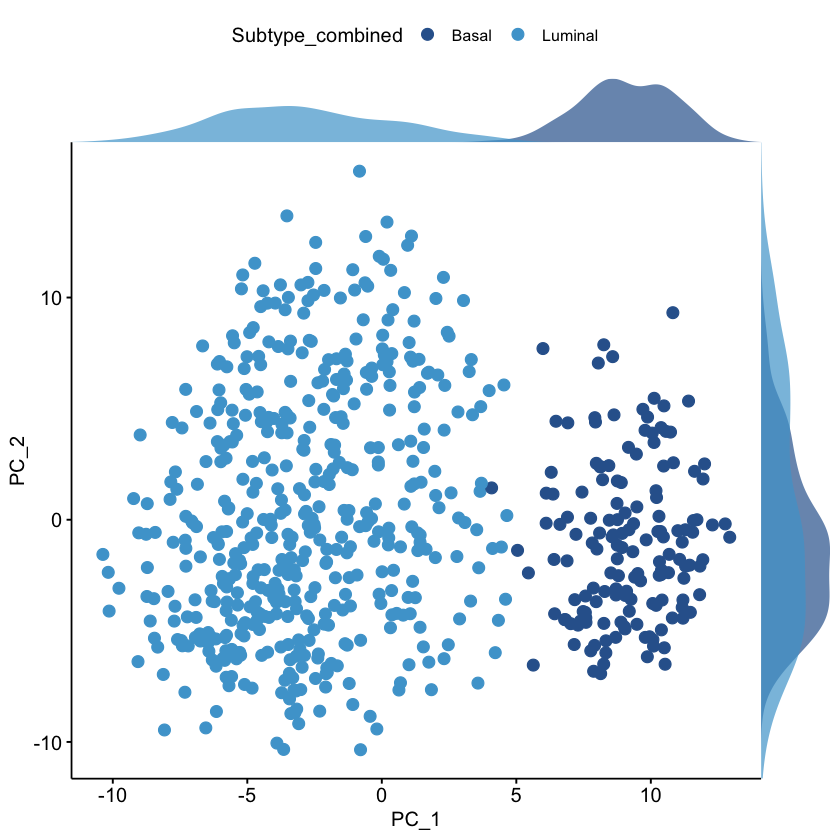

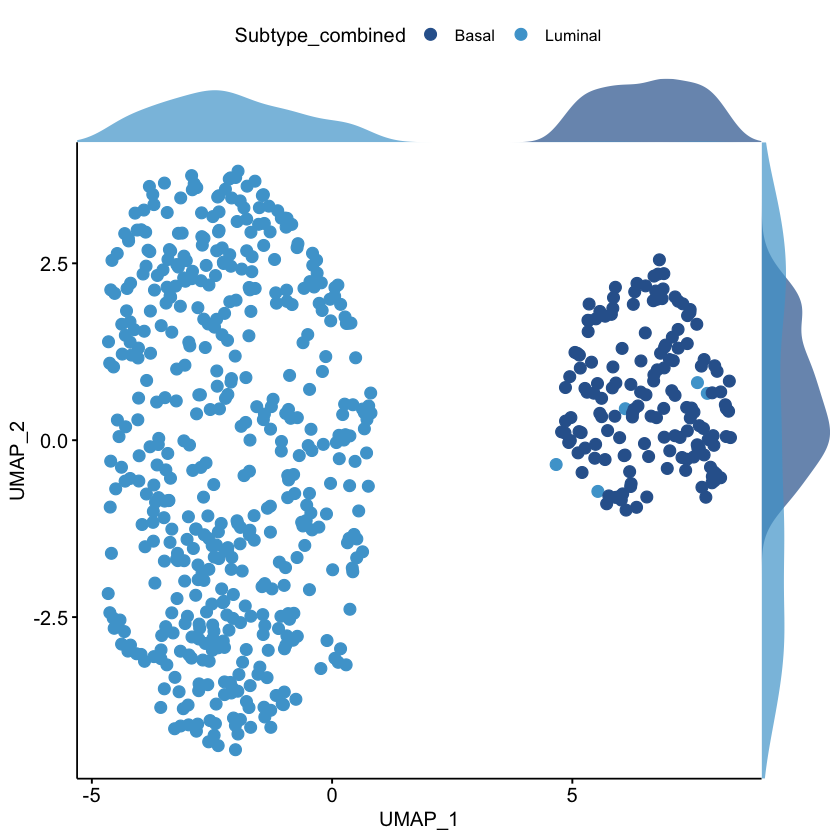

In [6]:
# Perform PCA
so_subtype <- RunPCA(so_subtype, features = VariableFeatures(object = so_subtype), approx = FALSE)

# PCA with density plots
p <- plot_pca(so_subtype, "Subtype_combined")
ggdraw(p)
ggsave(sprintf("%s/pca_density_subtype.pdf", results_path), dev = "pdf", height = 7.5, width = 6.75)

# Calculate UMAP
so_subtype <- RunUMAP(so_subtype, dims = 1:10)

# UMAP with density plots
p <- plot_umap(so_subtype, "Subtype_combined")
ggdraw(p)
ggsave(sprintf("%s/umap_density_subtype.pdf", results_path), dev = "pdf", height = 7.5, width = 6.75)